In [1]:
import numpy as np
import matplotlib.pyplot as plt
import csv
import pandas as pd
from astropy.io import fits
from astropy.coordinates import SkyCoord
from matplotlib import cm

In [2]:
file = open('/Users/natachaupra/Desktop/Project/Senior-Project/manga_sample_final_.csv', 'r')
sample = csv.reader(file)

In [3]:
drpall_list = fits.open("/Users/natachaupra/Desktop/Project/Senior-Project/platelist-v2_4_3.fits")

In [4]:
drp_data = fits.open('/Users/natachaupra/Desktop/Project/Senior-Project/drpall-v2_4_3.fits')

In [5]:
# drpall_list[1].header

In [6]:
pd.set_option('display.max_rows', None)
df = pd.DataFrame(sample)
df

,0,1,2,3,4,5,6,7,8,9,10,11
0,#Number,specobjid,mangaid,z,ra,dec,plate,mjd,fiberid,run,camcol,field
1,0,800534387039954944,1-109308,0.131681,49.9495621925,-0.22114540619,711,52202,71,3438,3,133
2,1,819713723454220288,1-113468,0.136342,317.918280237,9.34565198917,728,52520,213,1739,1,26
3,2,819717846622824448,1-113476,0.118158,317.568825378,10.4088108392,728,52520,228,1754,4,57
4,3,819755230018168832,1-113521,0.135043,317.388736588,11.5029226993,728,52520,364,1739,6,25
5,4,820857764430505984,1-113668,0.129233,318.827736002,10.4968107833,729,52468,279,1754,4,65
6,5,820864361500272640,1-113675,0.129881,318.775640877,10.0984558649,729,52468,303,1754,3,64
7,6,827562312314415104,1-114973,0.12046,332.238573881,11.8776065621,735,52519,94,2566,2,127
8,7,851310390057920512,1-121532,0.139965,118.09111,34.32657,756,52237,451,6727,5,57
9,8,611385123731957760,1-121737,0.113369,118.291306687,35.9325202653,543,52017,78,2131,6,92


In [7]:
file.close()

In [8]:
mangaid = np.array(df[[df.columns[2]]])

In [9]:
mangaid = mangaid[1:]

In [10]:
mangaid.flatten();
len(mangaid)

166

In [11]:
objlist = drpall_list[2].data

In [12]:
plateifu = {}
lst = []
for i in range(len(objlist)):
    if objlist[i][3] in mangaid:
        if objlist[i][3] in plateifu:
            plateifu[objlist[i][3]].append(objlist[i][2])
        else:
            plateifu[objlist[i][3]] = [objlist[i][2]]

In [13]:
plateifu

{'1-55683': ['10001-6101'],
 '1-93876': ['8484-9101', '8555-3704'],
 '1-569042': ['8484-12701'],
 '1-197867': ['8597-3701'],
 '1-210578': ['8979-12702'],
 '1-210547': ['8979-9102'],
 '1-569077': ['8979-6103'],
 '1-134760': ['8600-9102', '8555-12701'],
 '1-569162': ['8600-9101'],
 '1-232720': ['8462-3702'],
 '1-260743': ['8447-6104'],
 '1-260377': ['8447-6102'],
 '1-217041': ['8247-9102'],
 '1-419288': ['8554-6103'],
 '1-419607': ['8554-9102'],
 '1-414400': ['8554-6102'],
 '1-547999': ['8132-12701'],
 '1-548001': ['8132-6103'],
 '1-377471': ['8132-3701'],
 '1-338629': ['8132-12703'],
 '1-548024': ['8132-6101'],
 '1-93471': ['8483-6104'],
 '1-558912': ['8274-12704', '8256-12704', '8451-12701'],
 '1-278075': ['8257-6104'],
 '1-266074': ['8333-12704', '8329-3703'],
 '1-265849': ['8333-6104'],
 '1-265907': ['8333-12702'],
 '1-266288': ['8333-3703'],
 '1-266328': ['8333-9102'],
 '1-320677': ['8326-9101'],
 '1-156039': ['8439-3704'],
 '1-156158': ['8439-3703'],
 '1-258425': ['8261-12702'],
 '

In [14]:
plateifu['1-113468']

['7815-3701']

In [15]:
dup1 = fits.open('/Volumes/WD_External/MaNGA_Sample/manga-8484-9101-LOGCUBE.fits.gz') #166
dup2 = fits.open('/Volumes/WD_External/MaNGA_Sample/manga-8555-3704-LOGCUBE.fits.gz') #166

dup3 = fits.open('/Volumes/WD_External/MaNGA_Sample/manga-8600-9102-LOGCUBE.fits.gz') #12
dup4 = fits.open('/Volumes/WD_External/MaNGA_Sample/manga-8555-12701-LOGCUBE.fits.gz') #12

dup5 = fits.open('/Volumes/WD_External/MaNGA_Sample/manga-8274-12704-LOGCUBE.fits.gz') #145
dup6 = fits.open('/Volumes/WD_External/MaNGA_Sample/manga-8256-12704-LOGCUBE.fits.gz') #145
dup7 = fits.open('/Volumes/WD_External/MaNGA_Sample/manga-8451-12701-LOGCUBE.fits.gz') #145

dup8 = fits.open('/Volumes/WD_External/MaNGA_Sample/manga-8333-12704-LOGCUBE.fits.gz') #66
dup9 = fits.open('/Volumes/WD_External/MaNGA_Sample/manga-8329-3703-LOGCUBE.fits.gz') #66

dup10 = fits.open('/Volumes/WD_External/MaNGA_Sample/manga-8588-3701-LOGCUBE.fits.gz') #41
dup11 = fits.open('/Volumes/WD_External/MaNGA_Sample/manga-8603-12701-LOGCUBE.fits.gz') #41

In [16]:
dup_list = np.array([dup1, dup2, dup3, dup4, dup5, dup6, dup7, dup8, dup9, dup10, dup11])

In [17]:
index = [166, 12, 145, 66, 41]
ra_dec = {}
for i in index:
    ra_dec[(df.loc[[i]][4].to_string()[6:], df.loc[[i]][5].to_string()[6:])] = SkyCoord(df.loc[[i]][4],
    df.loc[[i]][5], frame = 'icrs', unit = 'deg').to_string('dms')

In [18]:
# P'James's
ra_dec

{(' 246.942944115', ' 44.177521384'): ['246d56m34.5988s 44d10m39.077s'],
 ('245.362216361', '42.76129006'): ['245d21m43.9789s 42d45m40.6442s'],
 (' 166.129407835', ' 42.6245544187'): ['166d07m45.8682s 42d37m28.3959s'],
 ('214.060210955', '43.9229334765'): ['214d03m36.7594s 43d55m22.5605s'],
 ('248.140561423', '39.1310206842'): ['248d08m26.0211s 39d07m51.6745s']}

In [19]:
# Duplicates
ra_dec_list = np.array([])

for i in range(11):
    ra_dec_list = np.append(ra_dec_list, SkyCoord((dup_list[i][0].header)['OBJRA'], 
                                                           (dup_list[i][0].header)['OBJDEC'],
                                                           frame = 'icrs', unit = 'deg').to_string('dms'))
ra_dec_list

array(['246d56m34.5988s 44d10m39.077s', '246d56m34.5988s 44d10m39.077s',
       '245d21m43.9789s 42d45m40.6442s', '245d21m43.9789s 42d45m40.6442s',
       '166d07m45.8682s 42d37m28.3959s', '166d07m45.8682s 42d37m28.3959s',
       '166d07m45.8682s 42d37m28.3959s', '214d03m36.7594s 43d55m22.5605s',
       '214d03m36.7594s 43d55m22.5605s', '248d08m26.0211s 39d07m51.6745s',
       '248d08m26.0211s 39d07m51.6745s'], dtype='<U32')

In [20]:
redshift = []
plateifu_list = ['8484-9101', '8555-3704', '8600-9102', '8555-12701', '8274-12704', '8256-12704', '8451-12701',
                '8333-12704', '8329-3703', '8588-3701', '8603-12701']

for i in range(len(drp_data[1].data)):
    if (drp_data[1].data)[i]['plateifu'] in plateifu_list:
        redshift.append(((drp_data[1].data)[i]['mangaid'],(drp_data[1].data)[i]['plateifu'],
                        (drp_data[1].data)[i]['nsa_z']))

sorted(redshift)

[('1-134760', '8555-12701', 0.138175),
 ('1-134760', '8600-9102', 0.138175),
 ('1-210700', '8588-3701', 0.130272),
 ('1-210700', '8603-12701', 0.130272),
 ('1-266074', '8329-3703', 0.13772),
 ('1-266074', '8333-12704', 0.13772),
 ('1-558912', '8256-12704', 0.12611),
 ('1-558912', '8274-12704', 0.12611),
 ('1-558912', '8451-12701', 0.12611),
 ('1-93876', '8484-9101', 0.139404),
 ('1-93876', '8555-3704', 0.139404)]

In [21]:
flux1 = np.transpose(dup1['FLUX'].data, axes=(2, 1, 0))
# print(len(flux1[0]),len(flux1))

flux2 = np.transpose(dup2['FLUX'].data, axes=(2, 1, 0))
# print(len(flux2[0]),len(flux2))

flux3 = np.transpose(dup3['FLUX'].data, axes=(2, 1, 0))
# print(len(flux3[0]),len(flux3))

flux4 = np.transpose(dup4['FLUX'].data, axes=(2, 1, 0))
# print(len(flux4[0]),len(flux4))

flux5 = np.transpose(dup5['FLUX'].data, axes=(2, 1, 0))
# print(len(flux5[0]),len(flux5))

flux6 = np.transpose(dup6['FLUX'].data, axes=(2, 1, 0))
# print(len(flux6[0]),len(flux6))

flux7 = np.transpose(dup7['FLUX'].data, axes=(2, 1, 0))
# print(len(flux7[0]),len(flux7))

flux8 = np.transpose(dup8['FLUX'].data, axes=(2, 1, 0))
# print(len(flux8[0]),len(flux8))

flux9 = np.transpose(dup9['FLUX'].data, axes=(2, 1, 0))
# print(len(flux9[0]),len(flux9))

flux10 = np.transpose(dup10['FLUX'].data, axes=(2, 1, 0))
# print(len(flux10[0]),len(flux10))

flux11 = np.transpose(dup11['FLUX'].data, axes=(2, 1, 0))
# print(len(flux11[0]),len(flux11))

In [22]:
flux_header1  = dup1['FLUX'].header
flux_header2  = dup2['FLUX'].header
flux_header3  = dup3['FLUX'].header
flux_header4  = dup4['FLUX'].header
flux_header5  = dup5['FLUX'].header
flux_header6  = dup6['FLUX'].header
flux_header7  = dup7['FLUX'].header
flux_header8  = dup8['FLUX'].header
flux_header9  = dup9['FLUX'].header
flux_header10 = dup10['FLUX'].header
flux_header11 = dup11['FLUX'].header

In [23]:
mask1 = np.transpose(dup1['MASK'].data, axes=(2, 1, 0))
# print(len(flux1[0]),len(flux1))

mask2 = np.transpose(dup2['MASK'].data, axes=(2, 1, 0))
# print(len(flux2[0]),len(flux2))

mask3 = np.transpose(dup3['MASK'].data, axes=(2, 1, 0))
# print(len(flux3[0]),len(flux3))

mask4 = np.transpose(dup4['MASK'].data, axes=(2, 1, 0))
# print(len(flux4[0]),len(flux4))

mask5 = np.transpose(dup5['MASK'].data, axes=(2, 1, 0))
# print(len(flux5[0]),len(flux5))

mask6 = np.transpose(dup6['MASK'].data, axes=(2, 1, 0))
# print(len(flux6[0]),len(flux6))

mask7 = np.transpose(dup7['MASK'].data, axes=(2, 1, 0))
# print(len(flux7[0]),len(flux7))

mask8 = np.transpose(dup8['MASK'].data, axes=(2, 1, 0))
# print(len(flux8[0]),len(flux8))

mask9 = np.transpose(dup9['MASK'].data, axes=(2, 1, 0))
# print(len(flux9[0]),len(flux9))

mask10 = np.transpose(dup10['MASK'].data, axes=(2, 1, 0))
# print(len(flux10[0]),len(flux10))

mask11 = np.transpose(dup11['MASK'].data, axes=(2, 1, 0))
# print(len(flux11[0]),len(flux11))

In [24]:
wave1 = dup1['WAVE'].data
wave2 = dup2['WAVE'].data
wave3 = dup3['WAVE'].data
wave4 = dup4['WAVE'].data
wave5 = dup5['WAVE'].data
wave6 = dup6['WAVE'].data
wave7 = dup7['WAVE'].data
wave8 = dup8['WAVE'].data
wave9 = dup9['WAVE'].data
wave10 = dup10['WAVE'].data
wave11 = dup11['WAVE'].data

In [25]:
x_center1 = int(flux_header1['CRPIX1']) - 1
y_center1 = int(flux_header1['CRPIX2']) - 1

do_not_use1 = (mask1 & 2**10) != 0
flux_m1 = np.ma.array(flux1, mask=do_not_use1)

redshift1 = 0.139404
ind_wave1 = np.where((wave1 / (1 + redshift1) > 4950) & (wave1 / (1 + redshift1) < 5050))[0]
halpha1 = flux_m1[:, :, ind_wave1].sum(axis=2)
im1 = halpha1.T

# Convert from array indices to arcsec relative to IFU center
dx1 = flux_header1['CD1_1'] * 3600.  # deg to arcsec
dy1 = flux_header1['CD2_2'] * 3600.  # deg to arcsec
x_extent1 = (np.array([0., im1.shape[0]]) - (im1.shape[0] - x_center1)) * dx1 * (-1)
y_extent1 = (np.array([0., im1.shape[1]]) - (im1.shape[1] - y_center1)) * dy1
extent1 = [x_extent1[0], x_extent1[1], y_extent1[0], y_extent1[1]]

In [26]:
x_center2 = int(flux_header2['CRPIX1']) - 1
y_center2 = int(flux_header2['CRPIX2']) - 1

do_not_use2 = (mask2 & 2**10) != 0
flux_m2 = np.ma.array(flux2, mask=do_not_use2)

redshift2 = 0.139404
ind_wave2 = np.where((wave2 / (1 + redshift2) > 4950) & (wave2 / (1 + redshift2) < 5050))[0]
halpha2 = flux_m2[:, :, ind_wave2].sum(axis=2)
im2 = halpha2.T

# Convert from array indices to arcsec relative to IFU center
dx2 = flux_header2['CD1_1'] * 3600.  # deg to arcsec
dy2 = flux_header2['CD2_2'] * 3600.  # deg to arcsec
x_extent2 = (np.array([0., im2.shape[0]]) - (im2.shape[0] - x_center2)) * dx2 * (-1)
y_extent2 = (np.array([0., im2.shape[1]]) - (im2.shape[1] - y_center2)) * dy2
extent2 = [x_extent2[0], x_extent2[1], y_extent2[0], y_extent2[1]]

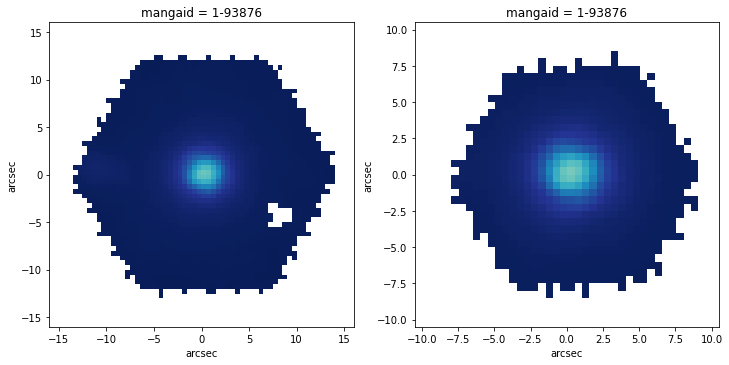

In [27]:
fig, axs1 = plt.subplots(1,2, figsize = (12,6))
axs1[0].imshow(im1, extent=extent1, cmap=cm.YlGnBu_r, vmin=0.1, vmax=100, origin='lower', interpolation='none')
axs1[1].imshow(im2, extent=extent2, cmap=cm.YlGnBu_r, vmin=0.1, vmax=100, origin='lower', interpolation='none')
axs1[0].set_xlabel('arcsec')
axs1[0].set_ylabel('arcsec')
axs1[1].set_xlabel('arcsec')
axs1[1].set_ylabel('arcsec')
axs1[0].set_title('mangaid = 1-93876')
axs1[1].set_title('mangaid = 1-93876')
plt.show()

In [28]:
x_center3 = int(flux_header3['CRPIX1']) - 1
y_center3 = int(flux_header3['CRPIX2']) - 1

do_not_use3 = (mask3 & 2**10) != 0
flux_m3 = np.ma.array(flux3, mask=do_not_use3)

redshift3 = 0.138175
ind_wave3 = np.where((wave3 / (1 + redshift3) > 4950) & (wave3 / (1 + redshift3) < 5050))[0]
halpha3 = flux_m3[:, :, ind_wave3].sum(axis=2)
im3 = halpha3.T

# Convert from array indices to arcsec relative to IFU center
dx3 = flux_header3['CD1_1'] * 3600.  # deg to arcsec
dy3 = flux_header3['CD2_2'] * 3600.  # deg to arcsec
x_extent3 = (np.array([0., im3.shape[0]]) - (im3.shape[0] - x_center3)) * dx3 * (-1)
y_extent3 = (np.array([0., im3.shape[1]]) - (im3.shape[1] - y_center3)) * dy3
extent3 = [x_extent3[0], x_extent3[1], y_extent3[0], y_extent3[1]]

In [29]:
x_center4 = int(flux_header4['CRPIX1']) - 1
y_center4 = int(flux_header4['CRPIX2']) - 1

do_not_use4 = (mask4 & 2**10) != 0
flux_m4 = np.ma.array(flux4, mask=do_not_use4)

redshift4 = 0.138175
ind_wave4 = np.where((wave4 / (1 + redshift4) > 4950) & (wave4 / (1 + redshift4) < 5050))[0]
halpha4 = flux_m4[:, :, ind_wave4].sum(axis=2)
im4 = halpha4.T

# Convert from array indices to arcsec relative to IFU center
dx4 = flux_header4['CD1_1'] * 3600.  # deg to arcsec
dy4 = flux_header4['CD2_2'] * 3600.  # deg to arcsec
x_extent4 = (np.array([0., im4.shape[0]]) - (im4.shape[0] - x_center4)) * dx4 * (-1)
y_extent4 = (np.array([0., im4.shape[1]]) - (im4.shape[1] - y_center4)) * dy4
extent4 = [x_extent4[0], x_extent4[1], y_extent4[0], y_extent4[1]]

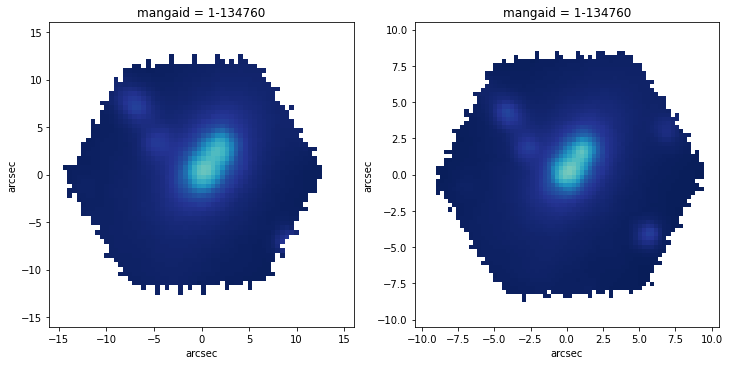

In [30]:
fig, axs2 = plt.subplots(1,2, figsize = (12,6))
axs2[0].imshow(im3, extent=extent1, cmap=cm.YlGnBu_r, vmin=0.1, vmax=100, origin='lower', interpolation='none')
axs2[1].imshow(im4, extent=extent2, cmap=cm.YlGnBu_r, vmin=0.1, vmax=100, origin='lower', interpolation='none')
axs2[0].set_xlabel('arcsec')
axs2[0].set_ylabel('arcsec')
axs2[1].set_xlabel('arcsec')
axs2[1].set_ylabel('arcsec')
axs2[0].set_title('mangaid = 1-134760')
axs2[1].set_title('mangaid = 1-134760')
plt.show()

In [31]:
x_center5 = int(flux_header5['CRPIX1']) - 1
y_center5 = int(flux_header5['CRPIX2']) - 1

do_not_use5 = (mask5 & 2**10) != 0
flux_m5 = np.ma.array(flux5, mask=do_not_use5)

redshift5 = 0.12611
ind_wave5 = np.where((wave5 / (1 + redshift5) > 4950) & (wave5 / (1 + redshift5) < 5050))[0]
halpha5 = flux_m5[:, :, ind_wave5].sum(axis=2)
im5 = halpha5.T

# Convert from array indices to arcsec relative to IFU center
dx5 = flux_header5['CD1_1'] * 3600.  # deg to arcsec
dy5 = flux_header5['CD2_2'] * 3600.  # deg to arcsec
x_extent5 = (np.array([0., im5.shape[0]]) - (im5.shape[0] - x_center5)) * dx5 * (-1)
y_extent5 = (np.array([0., im5.shape[1]]) - (im5.shape[1] - y_center5)) * dy5
extent5 = [x_extent5[0], x_extent5[1], y_extent5[0], y_extent5[1]]

In [32]:
x_center6 = int(flux_header6['CRPIX1']) - 1
y_center6 = int(flux_header6['CRPIX2']) - 1

do_not_use6 = (mask6 & 2**10) != 0
flux_m6 = np.ma.array(flux6, mask=do_not_use6)

redshift6 = 0.12611
ind_wave6 = np.where((wave6 / (1 + redshift6) > 4950) & (wave6 / (1 + redshift6) < 5050))[0]
halpha6 = flux_m6[:, :, ind_wave6].sum(axis=2)
im6 = halpha6.T

# Convert from array indices to arcsec relative to IFU center
dx6 = flux_header6['CD1_1'] * 3600.  # deg to arcsec
dy6 = flux_header6['CD2_2'] * 3600.  # deg to arcsec
x_extent6 = (np.array([0., im6.shape[0]]) - (im6.shape[0] - x_center6)) * dx6 * (-1)
y_extent6 = (np.array([0., im6.shape[1]]) - (im6.shape[1] - y_center6)) * dy6
extent6 = [x_extent6[0], x_extent6[1], y_extent6[0], y_extent6[1]]

In [33]:
x_center7 = int(flux_header7['CRPIX1']) - 1
y_center7 = int(flux_header7['CRPIX2']) - 1

do_not_use7 = (mask7 & 2**10) != 0
flux_m7 = np.ma.array(flux7, mask=do_not_use7)

redshift7 = 0.12611
ind_wave7 = np.where((wave7 / (1 + redshift7) > 4950) & (wave7 / (1 + redshift7) < 5050))[0]
halpha7 = flux_m7[:, :, ind_wave7].sum(axis=2)
im7 = halpha7.T

# Convert from array indices to arcsec relative to IFU center
dx7 = flux_header7['CD1_1'] * 3600.  # deg to arcsec
dy7 = flux_header7['CD2_2'] * 3600.  # deg to arcsec
x_extent7 = (np.array([0., im7.shape[0]]) - (im7.shape[0] - x_center7)) * dx7 * (-1)
y_extent7 = (np.array([0., im7.shape[1]]) - (im7.shape[1] - y_center7)) * dy7
extent7 = [x_extent7[0], x_extent7[1], y_extent7[0], y_extent7[1]]

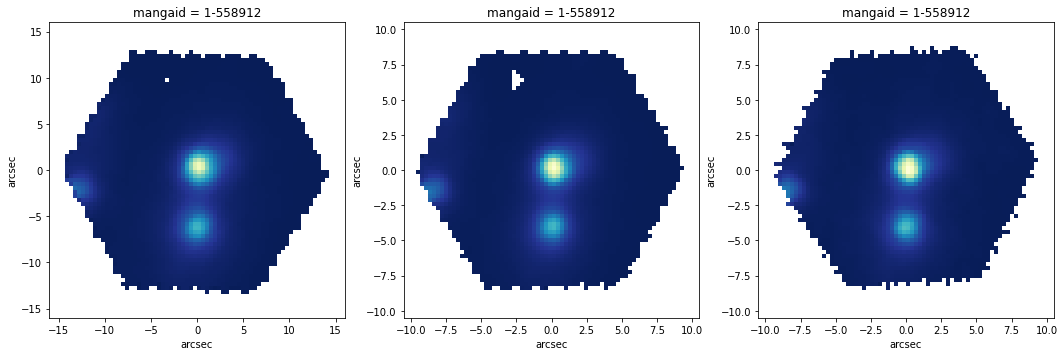

In [34]:
fig, axs3 = plt.subplots(1,3, figsize = (18,10))
axs3[0].imshow(im5, extent=extent1, cmap=cm.YlGnBu_r, vmin=0.1, vmax=100, origin='lower', interpolation='none')
axs3[1].imshow(im6, extent=extent2, cmap=cm.YlGnBu_r, vmin=0.1, vmax=100, origin='lower', interpolation='none')
axs3[2].imshow(im7, extent=extent2, cmap=cm.YlGnBu_r, vmin=0.1, vmax=100, origin='lower', interpolation='none')
axs3[0].set_xlabel('arcsec')
axs3[0].set_ylabel('arcsec')
axs3[1].set_xlabel('arcsec')
axs3[1].set_ylabel('arcsec')
axs3[2].set_xlabel('arcsec')
axs3[2].set_ylabel('arcsec')
axs3[0].set_title('mangaid = 1-558912')
axs3[1].set_title('mangaid = 1-558912')
axs3[2].set_title('mangaid = 1-558912')
plt.show()

In [35]:
x_center8 = int(flux_header8['CRPIX1']) - 1
y_center8 = int(flux_header8['CRPIX2']) - 1

do_not_use8 = (mask8 & 2**10) != 0
flux_m8 = np.ma.array(flux8, mask=do_not_use8)

redshift8 = 0.13772
ind_wave8 = np.where((wave8 / (1 + redshift8) > 4950) & (wave8 / (1 + redshift8) < 5050))[0]
halpha8 = flux_m8[:, :, ind_wave8].sum(axis=2)
im8 = halpha8.T

# Convert from array indices to arcsec relative to IFU center
dx8 = flux_header8['CD1_1'] * 3600.  # deg to arcsec
dy8 = flux_header8['CD2_2'] * 3600.  # deg to arcsec
x_extent8 = (np.array([0., im8.shape[0]]) - (im8.shape[0] - x_center8)) * dx8 * (-1)
y_extent8 = (np.array([0., im8.shape[1]]) - (im8.shape[1] - y_center8)) * dy8
extent8 = [x_extent8[0], x_extent8[1], y_extent8[0], y_extent8[1]]

In [36]:
x_center9 = int(flux_header9['CRPIX1']) - 1
y_center9 = int(flux_header9['CRPIX2']) - 1

do_not_use9 = (mask9 & 2**10) != 0
flux_m9 = np.ma.array(flux9, mask=do_not_use9)

redshift9 = 0.13772
ind_wave9 = np.where((wave9 / (1 + redshift9) > 4950) & (wave9 / (1 + redshift9) < 5050))[0]
halpha9 = flux_m9[:, :, ind_wave9].sum(axis=2)
im9 = halpha9.T

# Convert from array indices to arcsec relative to IFU center
dx9 = flux_header9['CD1_1'] * 3600.  # deg to arcsec
dy9 = flux_header9['CD2_2'] * 3600.  # deg to arcsec
x_extent9 = (np.array([0., im9.shape[0]]) - (im9.shape[0] - x_center9)) * dx9 * (-1)
y_extent9 = (np.array([0., im9.shape[1]]) - (im9.shape[1] - y_center9)) * dy9
extent9 = [x_extent9[0], x_extent9[1], y_extent9[0], y_extent9[1]]

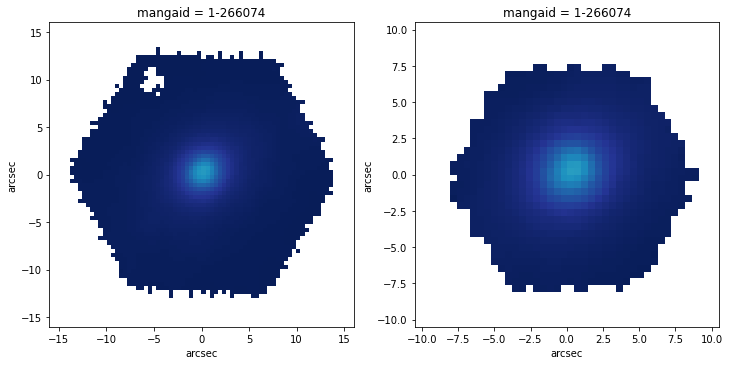

In [37]:
fig, axs4 = plt.subplots(1,2, figsize = (12,6))
axs4[0].imshow(im8, extent=extent1, cmap=cm.YlGnBu_r, vmin=0.1, vmax=100, origin='lower', interpolation='none')
axs4[1].imshow(im9, extent=extent2, cmap=cm.YlGnBu_r, vmin=0.1, vmax=100, origin='lower', interpolation='none')
axs4[0].set_xlabel('arcsec')
axs4[0].set_ylabel('arcsec')
axs4[1].set_xlabel('arcsec')
axs4[1].set_ylabel('arcsec')
axs4[0].set_title('mangaid = 1-266074')
axs4[1].set_title('mangaid = 1-266074')
plt.show()

In [38]:
x_center10 = int(flux_header10['CRPIX1']) - 1
y_center10 = int(flux_header10['CRPIX2']) - 1

do_not_use10 = (mask10 & 2**10) != 0
flux_m10 = np.ma.array(flux10, mask=do_not_use10)

redshift10 = 0.130272
ind_wave10 = np.where((wave10 / (1 + redshift10) > 4950) & (wave10 / (1 + redshift10) < 5050))[0]
halpha10 = flux_m10[:, :, ind_wave10].sum(axis=2)
im10 = halpha10.T

# Convert from array indices to arcsec relative to IFU center
dx10 = flux_header10['CD1_1'] * 3600.  # deg to arcsec
dy10 = flux_header10['CD2_2'] * 3600.  # deg to arcsec
x_extent10 = (np.array([0., im10.shape[0]]) - (im10.shape[0] - x_center10)) * dx10 * (-1)
y_extent10 = (np.array([0., im10.shape[1]]) - (im10.shape[1] - y_center10)) * dy10
extent10 = [x_extent10[0], x_extent10[1], y_extent10[0], y_extent10[1]]

In [39]:
x_center11 = int(flux_header11['CRPIX1']) - 1
y_center11 = int(flux_header11['CRPIX2']) - 1

do_not_use11 = (mask11 & 2**10) != 0
flux_m11 = np.ma.array(flux11, mask=do_not_use11)

redshift11 = 0.130272
ind_wave11 = np.where((wave11 / (1 + redshift11) > 4950) & (wave11 / (1 + redshift11) < 5050))[0]
halpha11 = flux_m11[:, :, ind_wave11].sum(axis=2)
im11 = halpha11.T

# Convert from array indices to arcsec relative to IFU center
dx11 = flux_header11['CD1_1'] * 3600.  # deg to arcsec
dy11 = flux_header11['CD2_2'] * 3600.  # deg to arcsec
x_extent11 = (np.array([0., im11.shape[0]]) - (im11.shape[0] - x_center11)) * dx11 * (-1)
y_extent11 = (np.array([0., im11.shape[1]]) - (im11.shape[1] - y_center11)) * dy11
extent11 = [x_extent11[0], x_extent11[1], y_extent11[0], y_extent11[1]]

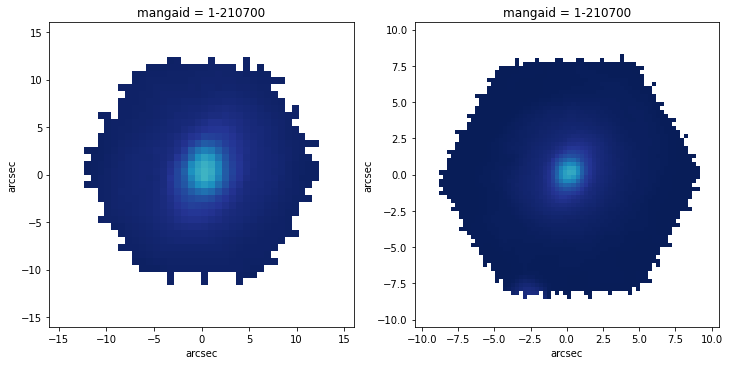

In [40]:
fig, axs5 = plt.subplots(1,2, figsize = (12,6))
axs5[0].imshow(im10, extent=extent1, cmap=cm.YlGnBu_r, vmin=0.1, vmax=100, origin='lower', interpolation='none')
axs5[1].imshow(im11, extent=extent2, cmap=cm.YlGnBu_r, vmin=0.1, vmax=100, origin='lower', interpolation='none')
axs5[0].set_xlabel('arcsec')
axs5[0].set_ylabel('arcsec')
axs5[1].set_xlabel('arcsec')
axs5[1].set_ylabel('arcsec')
axs5[0].set_title('mangaid = 1-210700')
axs5[1].set_title('mangaid = 1-210700')
plt.show()

In [41]:
# n1 = len(flux1[0])
# sumflux1 = [0.]*(4563)

# for i in range(n1):
#     for j in range(n1):
#         sumflux1 = [sum(x) for x in zip(sumflux1,flux1[i][j])]

In [42]:
# n2 = len(flux2[0])
# sumflux2 = [0.]*(4563)

# for i in range(n2):
#     for j in range(n2):
#         sumflux2 = [sum(x) for x in zip(sumflux2,flux2[i][j])]

In [43]:
# n3 = len(flux3[0])
# sumflux3 = [0.]*(4563)

# for i in range(n3):
#     for j in range(n3):
#         sumflux3 = [sum(x) for x in zip(sumflux3,flux3[i][j])]

In [44]:
# n4 = len(flux4[0])
# sumflux4 = [0.]*(4563)
# sumflux5 = [0.]*(4563)
# sumflux6 = [0.]*(4563)
# sumflux7 = [0.]*(4563)
# sumflux8 = [0.]*(4563)

# for i in range(n4):
#     for j in range(n4):
#         sumflux4 = [sum(x) for x in zip(sumflux4,flux4[i][j])]
#         sumflux5 = [sum(x) for x in zip(sumflux5,flux5[i][j])]
#         sumflux6 = [sum(x) for x in zip(sumflux6,flux6[i][j])]
#         sumflux7 = [sum(x) for x in zip(sumflux7,flux7[i][j])]
#         sumflux8 = [sum(x) for x in zip(sumflux8,flux8[i][j])]

In [45]:
# n9 = len(flux9[0])
# sumflux9 =  [0.]*(4563)
# sumflux10 = [0.]*(4563)

# for i in range(n9):
#     for j in range(n9):
#         sumflux9 = [sum(x) for x in zip(sumflux9,flux9[i][j])]
#         sumflux10 = [sum(x) for x in zip(sumflux10,flux10[i][j])]

In [46]:
# n11 = len(flux11[0])
# sumflux11 = [0.]*(4563)

# for i in range(n11):
#     for j in range(n11):
#         sumflux11 = [sum(x) for x in zip(sumflux11,flux11[i][j])]

In [47]:
# len(sumflux1),len(sumflux2),len(sumflux3),len(sumflux4),len(sumflux5),len(sumflux6),len(sumflux7),len(sumflux8),len(sumflux9),len(sumflux10),len(sumflux11)

In [48]:
# plt.figure(figsize = (17,7))
# plt.grid()
# plt.xlabel('Wavelength in ang')
# plt.ylabel('Flux density')
# plt.ylim(-200,400)
# plt.title('mangaid = 1-93876')
# plt.plot(wave1, sumflux1, label = '8484-9101')
# plt.plot(wave2, sumflux2, label = '8555-3704', alpha = 0.7)
# plt.legend()

In [49]:
# plt.figure(figsize = (17,7))
# plt.grid()
# plt.xlabel('Wavelength in ang')
# plt.ylabel('Flux density')
# plt.ylim(-100,400)
# plt.title('mangaid = 1-134760')
# plt.plot(wave3, sumflux3, label = '8600-9102')
# plt.plot(wave4, sumflux4, label = '8555-12701', alpha = 0.6)
# plt.legend()

In [50]:
# plt.figure(figsize = (17,7))
# plt.grid()
# plt.xlabel('Wavelength in ang')
# plt.ylabel('Flux density')
# plt.ylim(-100,400)
# plt.title('mangaid = 1-558912')
# plt.plot(wave5, sumflux5, label = '8274-12704')
# plt.plot(wave6, sumflux6, label = '8256-12704', alpha = 0.7)
# plt.plot(wave7, sumflux7, label = '8451-12701', alpha = 0.3, color = 'springgreen')
# plt.legend()

In [51]:
# plt.figure(figsize = (17,7))
# plt.grid()
# plt.ylim(-100, 350)
# plt.xlabel('Wavelength in ang')
# plt.ylabel('Flux density')
# plt.title('mangaid = 1-266074')
# plt.plot(wave8, sumflux8, label = '8333-12704')
# plt.plot(wave9, sumflux9, label = '8329-3703', alpha = 0.7)
# plt.legend()

In [52]:
# plt.figure(figsize = (17,7))
# plt.grid()
# plt.ylim(-200,200)
# plt.xlabel('Wavelength index')
# plt.ylabel('Flux density')
# plt.title('mangaid = 1-210700')
# plt.plot(wave10, sumflux10, label = '8588-3701')
# plt.plot(wave11, sumflux11, label = '8603-12701', alpha = 0.7)
# plt.legend()